In [2]:
import pandas as pd

In [5]:
df21 = pd.read_csv('Sales_data/2021.csv')
df20 = pd.read_csv('Sales_data/2020.csv')
df19 = pd.read_csv('Sales_data/2019.csv')
df18 = pd.read_csv('Sales_data/2018.csv')
df17 = pd.read_csv('Sales_data/2017.csv')

/Users/vtdigger/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df20.columns

Index(['receivedDate', 'postedDate', 'DLN', 'totalSellers', 'totalBuyers',
       'propertyLocationStreet', 'propertyLocationCity', 'closingDate',
       'interestPropertyType', 'specialFactorsDevRights',
       'specialFactorsRelationship', 'buildingTypeMultiFamily',
       'buildingTypeMultiUnit', 'sellerUseOfProperty', 'buyerUseOfProperty',
       'specialCircumCode', 'legacyBuyerUseOfProperty',
       'legacySellerUseOfProperty', 'propertyTaxExemption', 'totalPricePaid',
       'personalPropertyPricePaid', 'realPropertyPricePaid',
       'principalResidenceValue', 'currentUseMarketValue', 'taxDue',
       'dateSellerAcquired', 'noLandGainsTaxReturn1', 'city', 'dateOfRecord',
       'listedValue', 'parcelIDNo', 'grandListCategory', 'span', 'townCode',
       'schoolCode', 'countyCode', 'landSize', 'financingOther',
       'buildingTypeOther', 'rentedAfter', 'buildingTypeNone', 'financingBank',
       'buildingTypeSingle', 'buildingTypeFarm', 'currentUseValueLien',
       'currentUse

In [7]:
df = pd.concat([df17, df18, df19, df20, df21])

In [8]:
df.head()

,receivedDate,postedDate,DLN,totalSellers,totalBuyers,propertyLocationStreet,propertyLocationCity,closingDate,interestPropertyType,landSize,...,buildingTypeMultiUnit,buyerAdjoiningProperty,rentedBefore,buildingTypeStore,tenantPurchase,financingOwner,buildingTypeFactory,personalPropertyPricePaid,buildingTypeNewCons,currentUseMarketValue
0,2017-01-10,2017-01-13,DK 475648512,1,2,181 SNOWFLAKE LANE,Thetford,2017-01-06,1.0,2.1100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-06,2017-01-10,201607061118956033,2,2,1132 SHADOW LAKE ROAD,WATERFORD,2016-06-17,1.0,14.8000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-11-29,2017-01-17,201612081129835044,2,1,1471 COUNTY ROAD,WINDSOR,2016-10-28,1.0,0.0114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-08-09,2017-01-10,201608111121689027,1,2,56 JOINER BROOK LANE,WATERBURY,2016-07-13,1.0,0.0500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-10,2017-01-10,DK 104012288,1,1,69 Burgess Road,Bennington,2016-11-28,1.0,0.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['receivedDate', 'postedDate', 'DLN', 'totalSellers', 'totalBuyers',
       'propertyLocationStreet', 'propertyLocationCity', 'closingDate',
       'interestPropertyType', 'landSize', 'specialFactorsDevRights',
       'financingBank', 'buildingTypeSingle', 'sellerUseOfProperty',
       'buyerUseOfProperty', 'specialCircumCode', 'legacyBuyerUseOfProperty',
       'legacySellerUseOfProperty', 'totalPricePaid', 'realPropertyPricePaid',
       'principalResidenceValue', 'taxDue', 'dateSellerAcquired',
       'noLandGainsTaxReturn1', 'city', 'dateOfRecord', 'listedValue',
       'parcelIDNo', 'grandListCategory', 'span', 'townCode', 'schoolCode',
       'countyCode', 'specialFactorsRelationship', 'propertyTaxExemption',
       'buildingTypeNone', 'financingOther', 'buildingTypeCondo',
       'buildingTypeConUnit', 'interestUndivPercent', 'buildingTypeMobile',
       'buildingTypeSeasonal', 'rentedAfter', 'buildingTypeOther',
       'buildingTypeFarm', 'currentUseValueLien',
       'cu

In [10]:
df.grandListCategory.unique()

array([1, 6, 14, 13, 15, 4, 2, 5, 3, 12, 7, 8, 9, 10, 11, '01', '07',
       '02', '13', '03', '15', '06', '05', '12', '14', '04', '08', '09',
       '10', nan, '11', 'M', '51', '82', 'R1', '0', 'MH', '44', '88',
       '41', 'R2', 'EX', 'R'], dtype=object)

In [11]:
df['closeDateClean'] = pd.to_datetime(df['closingDate'])
df['Month'] = df.closeDateClean.map(lambda x: x.month)
df['Year'] = df.closeDateClean.map(lambda x: x.year)

In [34]:
#about a 2.3% increase
df.pivot_table(index='Year', values='DLN', aggfunc=len).tail(5)

,DLN
Year,
2017,29914
2018,29190
2019,29421
2020,30200
2021,3748


In [12]:
dfmonthyear = df.pivot_table(index='Month', columns='Year', values='DLN', aggfunc=len)

In [13]:
import matplotlib.pyplot as plt

In [14]:
dfmonthyear.columns

Int64Index([1973, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
            2021],
           dtype='int64', name='Year')

<AxesSubplot:title={'center':'All transfers'}, xlabel='Month'>

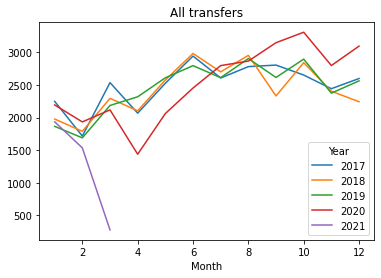

In [16]:
dfmonthyear[[2017, 2018, 2019, 2020, 2021]].plot(title='All transfers')

In [17]:
rescodes = [1, 6,  4, 2, 5, 3, 
       '01',  '03',  '05', '04', '02', '06',  
       'M',  '0']

In [18]:
dfres = df[df.grandListCategory.isin(rescodes)]

In [36]:
#about a 5% increase over three-year average
dfres.pivot_table(index='Year', values='DLN', aggfunc=len).tail(5)

,DLN
Year,
2017,20600
2018,20159
2019,20807
2020,21618
2021,2603


<AxesSubplot:title={'center':'Residential, Mobile home and vacation transfers'}, xlabel='Month'>

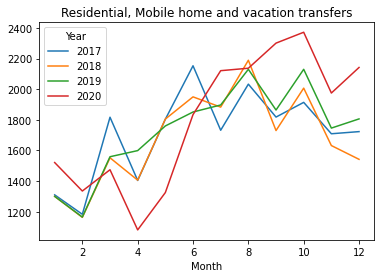

In [35]:
resmy = dfres.pivot_table(index='Month', columns='Year', values='DLN', aggfunc=len)
resmy[[2017, 2018, 2019, 2020]].plot(title='Residential, Mobile home and vacation transfers')

In [29]:
comcodes = [7,8,9,'07','08','09']

<AxesSubplot:title={'center':'Commercial and Industrial transfers'}, xlabel='Month'>

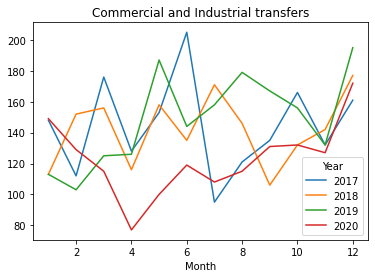

In [32]:
dfcom = df[df.grandListCategory.isin(comcodes)]
commy = dfcom.pivot_table(index='Month', columns='Year', values='DLN', aggfunc=len)
commy[[2017, 2018, 2019, 2020]].plot(title='Commercial and Industrial transfers')

In [37]:
# about a 15% drop
dfcom.pivot_table(index='Year', values='DLN', aggfunc=len).tail(5)

,DLN
Year,
2017,1732
2018,1704
2019,1785
2020,1474
2021,215


In [20]:
codes = pd.read_excel('Town_codes.xlsx')

In [21]:
codes.head()

,County code,Town code,Town name
0,1,3,ADDISON
1,10,6,ALBANY
2,7,9,ALBURG
3,14,12,ANDOVER
4,2,15,ARLINGTON


In [22]:
dftowns = df.merge(codes[['Town code', 'Town name']], left_on='townCode', 
        right_on='Town code', how='left')

In [23]:
dftowns.head()

,receivedDate,postedDate,DLN,totalSellers,totalBuyers,propertyLocationStreet,propertyLocationCity,closingDate,interestPropertyType,landSize,...,financingOwner,buildingTypeFactory,personalPropertyPricePaid,buildingTypeNewCons,currentUseMarketValue,closeDateClean,Month,Year,Town code,Town name
0,2017-01-10,2017-01-13,DK 475648512,1,2,181 SNOWFLAKE LANE,Thetford,2017-01-06,1.0,2.1100,...,NaN,NaN,NaN,NaN,NaN,2017-01-06,1,2017,642.0,THETFORD
1,2016-07-06,2017-01-10,201607061118956033,2,2,1132 SHADOW LAKE ROAD,WATERFORD,2016-06-17,1.0,14.8000,...,NaN,NaN,NaN,NaN,NaN,2016-06-17,6,2016,699.0,WATERFORD
2,2016-11-29,2017-01-17,201612081129835044,2,1,1471 COUNTY ROAD,WINDSOR,2016-10-28,1.0,0.0114,...,NaN,NaN,NaN,NaN,NaN,2016-10-28,10,2016,768.0,WINDSOR
3,2016-08-09,2017-01-10,201608111121689027,1,2,56 JOINER BROOK LANE,WATERBURY,2016-07-13,1.0,0.0500,...,NaN,NaN,NaN,NaN,NaN,2016-07-13,7,2016,69.0,BOLTON
4,2017-01-10,2017-01-10,DK 104012288,1,1,69 Burgess Road,Bennington,2016-11-28,1.0,0.2000,...,NaN,NaN,NaN,NaN,NaN,2016-11-28,11,2016,51.0,BENNINGTON


In [39]:
townyr = dftowns.pivot_table(
            index='Town name',
            columns='Year',
            values='DLN',
            aggfunc=len)

In [21]:
# townyr[[2017, 2018, 2019, 2020]].to_csv('Sales_data/towns_by_year.csv')

In [40]:
townyr = townyr[[2017, 2018, 2019, 2020, 2021]]

In [41]:
townyr['PrevAvg'] = townyr[[2017, 2018, 2019]].mean(axis=1)

In [42]:
townyr['2020vsAvg'] = ((townyr[2020] - townyr.PrevAvg) / townyr.PrevAvg) * 100

In [43]:
townyr.sort_values(by=2020, ascending=False).head(20)

Year,2017,2018,2019,2020,2021,PrevAvg,2020vsAvg
Town name,,,,,,,
BURLINGTON,893.0,888.0,863.0,855.0,112.0,881.333333,-2.987897
SO BURLINGTON,774.0,736.0,719.0,747.0,90.0,743.000000,0.538358
ESSEX,696.0,715.0,741.0,695.0,111.0,717.333333,-3.113383
STOWE,867.0,807.0,847.0,684.0,86.0,840.333333,-18.603729
COLCHESTER,648.0,557.0,675.0,623.0,50.0,626.666667,-0.585106
HARTFORD,540.0,493.0,556.0,589.0,64.0,529.666667,11.202014
CAMBRIDGE,436.0,608.0,724.0,575.0,14.0,589.333333,-2.432127
RUTLAND,553.0,525.0,514.0,547.0,79.0,530.666667,3.077889
BENNINGTON,504.0,469.0,531.0,449.0,84.0,501.333333,-10.438830


In [51]:
countyyr = dftowns.pivot_table(
            index='countyCode',
            columns='Year',
            values='DLN',
            aggfunc=len)
countyr = countyyr[[2017, 2018, 2019, 2020, 2021]]
countyr.head()
countyr['PrevAvg'] = countyr[[2017, 2018, 2019]].mean(axis=1)

countyr['2020vsAvg'] = ((countyr[2020] - countyr.PrevAvg) / countyr.PrevAvg) * 100

cocodes = pd.read_excel('county_codes.xlsx')
countyr.merge(cocodes, how='left', left_index=True, right_on='Code').sort_values(by='2020vsAvg', 
                                                                                ascending=False)

<ipython-input-51-2dca4fc2829b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countyr['PrevAvg'] = countyr[[2017, 2018, 2019]].mean(axis=1)
<ipython-input-51-2dca4fc2829b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countyr['2020vsAvg'] = ((countyr[2020] - countyr.PrevAvg) / countyr.PrevAvg) * 100


,2017,2018,2019,2020,2021,PrevAvg,2020vsAvg,Code,County
4,429.0,489.0,488.0,528.0,64.0,468.666667,12.660028,5,ESSEX
12,2786.0,2664.0,2755.0,3076.0,372.0,2735.000000,12.468007,13,WINDHAM
9,1588.0,1581.0,1509.0,1724.0,240.0,1559.333333,10.560068,10,ORLEANS
11,2583.0,2424.0,2472.0,2663.0,325.0,2493.000000,6.819093,12,WASHINGTON
2,1415.0,1435.0,1418.0,1507.0,245.0,1422.666667,5.927835,3,CALEDONIA
8,1247.0,1270.0,1202.0,1307.0,166.0,1239.666667,5.431568,9,ORANGE
5,2006.0,2110.0,2168.0,2184.0,236.0,2094.666667,4.264799,6,FRANKLIN
1,2220.0,2201.0,2438.0,2373.0,351.0,2286.333333,3.790640,2,BENNINGTON
6,497.0,518.0,484.0,518.0,46.0,499.666667,3.669113,7,GRAND ISLE
10,2787.0,2676.0,2701.0,2719.0,368.0,2721.333333,-0.085742,11,RUTLAND
